In [1]:
% matplotlib inline
import pandas
import numpy
import matplotlib.pyplot as plt

#Reading data

In [2]:
all_hits = pandas.read_csv('Data/strawtubesPoint_decoded_hits.csv', delimiter=',')
all_hits['Index'] = all_hits.index
all_hits = all_hits[['Index', 'X', 'Y', 'Z', 'TrackID', 'Time', 'StatNb', 'ViewNb', 'PlaneNb', 'LayerNb', 'StrawNb', 'dist2Wire', 'event', 'k']]
all_hits.head()

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k
0,0,8.883409,-61.202305,-1974.859985,3,232.044861,5,0,0,0,319,0.274822,0,0
1,1,8.858191,-61.225544,-1973.742188,3,232.074081,5,0,0,1,320,0.582455,0,1
2,2,8.824563,-61.256523,-1972.251953,3,232.118286,5,0,1,0,319,0.111252,0,2
3,3,8.632817,-61.432972,-1963.756592,3,232.406479,5,1,0,1,320,0.164412,0,3
4,4,8.573978,-61.487133,-1961.149292,3,232.488541,5,1,1,1,320,0.226827,0,4


#Get Event

In [3]:
from Y_views import *
event_id = 2 # 4.3
event = all_hits[all_hits['event'] == event_id]
event = modify_for_yz_analysis(event)
event

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k,Wy,Wz
79,79,73.361366,0.837755,2581.149902,2,383.880371,1,0,0,0,284,0.042245,2,38,0.8686,2581.15
41,41,64.405243,3.918991,2582.247559,3,383.923828,1,0,0,1,283,0.398998,2,0,3.5086,2582.25
42,42,64.391327,3.927866,2583.750244,3,383.967041,1,0,1,0,282,0.032134,2,1,3.9486,2583.75
80,80,73.391182,0.832995,2583.750732,2,383.973724,1,0,1,0,284,0.392995,2,39,0.4286,2583.75
48,48,64.137390,4.091341,2611.151855,3,384.884766,1,3,0,0,282,0.308665,2,7,4.3886,2611.15
85,85,73.705360,0.782221,2611.149902,2,384.881409,1,3,0,0,284,0.097779,2,44,0.8686,2611.15
49,49,64.113304,4.106993,2613.749023,3,384.968506,1,3,1,0,282,0.146996,2,8,3.9486,2613.75
86,86,73.735184,0.777356,2613.750732,2,384.972351,1,3,1,0,284,0.337356,2,45,0.4286,2613.75
87,87,75.654854,0.440022,2781.148926,2,390.561279,2,0,0,0,284,0.439979,2,46,0.8686,2781.15
50,50,62.551594,5.195495,2782.250488,3,390.588989,2,0,0,1,282,0.084507,2,9,5.2686,2782.25


#Get Track

In [4]:
track = event[event.TrackID == 2]
track

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k,Wy,Wz
79,79,73.361366,0.837755,2581.149902,2,383.880371,1,0,0,0,284,0.042245,2,38,0.8686,2581.15
80,80,73.391182,0.832995,2583.750732,2,383.973724,1,0,1,0,284,0.392995,2,39,0.4286,2583.75
85,85,73.705360,0.782221,2611.149902,2,384.881409,1,3,0,0,284,0.097779,2,44,0.8686,2611.15
86,86,73.735184,0.777356,2613.750732,2,384.972351,1,3,1,0,284,0.337356,2,45,0.4286,2613.75
87,87,75.654854,0.440022,2781.148926,2,390.561279,2,0,0,0,284,0.439979,2,46,0.8686,2781.15
88,88,75.667488,0.437574,2782.250977,2,390.597870,2,0,0,1,285,0.437575,2,47,-0.0114,2782.25
89,89,75.684669,0.434236,2783.750000,2,390.638794,2,0,1,0,284,0.005764,2,48,0.4286,2783.75
96,96,76.011482,0.369193,2812.250732,2,391.595184,2,3,0,1,285,0.369194,2,55,-0.0114,2812.25
97,97,76.028702,0.365713,2813.749756,2,391.639740,2,3,1,0,284,0.074288,2,56,0.4286,2813.75


#Regressions

In [5]:
from sklearn.linear_model import LinearRegression
from MarginLinearRegression import *

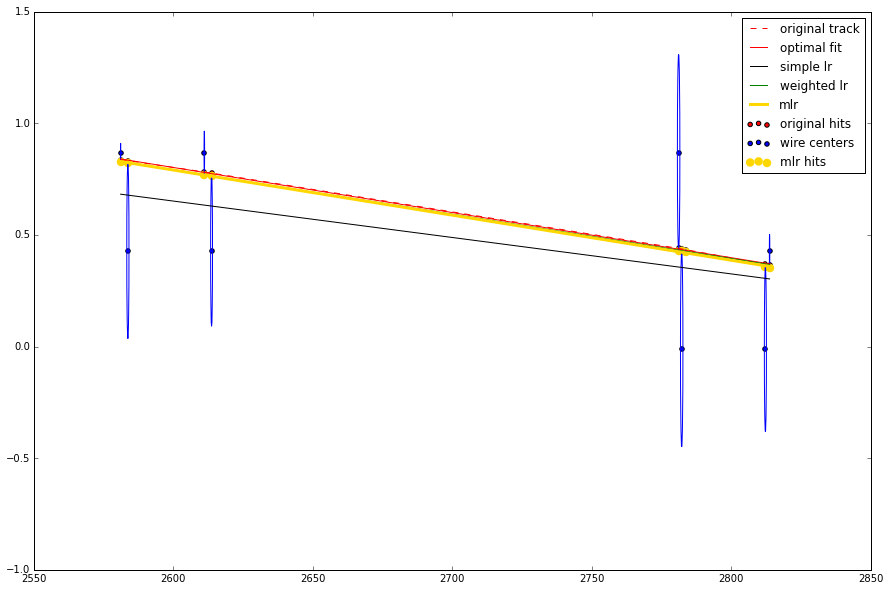

In [6]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = track.Wz.values.reshape(len(track), 1)
Wy = track.Wy.values.reshape(len(track), 1)
Z = track.Z.values.reshape(len(track), 1)
Y = track.Y.values.reshape(len(track), 1)
R = track.dist2Wire.values.reshape(len(track), 1)
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],1))

# originl track and hits
plt.plot(Z, Y, 'r--', label='original track')
plt.scatter(Z, Y, c='r', label='original hits')

# optimal fit
lr = LinearRegression()
lr.fit(Z, Y)
plt.plot(Z, lr.predict(Z), 'r', label='optimal fit')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)
    
# linear model fit
lr = LinearRegression()
lr.fit(Wz, Wy)
plt.plot(Wz, lr.predict(Wz), color='0', label='simple lr')

# weighted linear model fit
lr = LinearRegression()
w = (1./R).reshape(len(track), )
lr.fit(Wz, Wy, w)
plt.plot(Wz, lr.predict(Wz), color='g', label='weighted lr')

# margin linear regression
mlr = MarginLinearRegression(n_iter=2)
mlr.fit(Wz, Wy, R, R)
plt.plot(Wz, mlr.predict(Wz), color='gold', linewidth=3, label='mlr')
plt.scatter(mlr.hits_X, mlr.hits_Y, color='gold', linewidth=4, label='mlr hits')



plt.legend(loc='best')
plt.show()

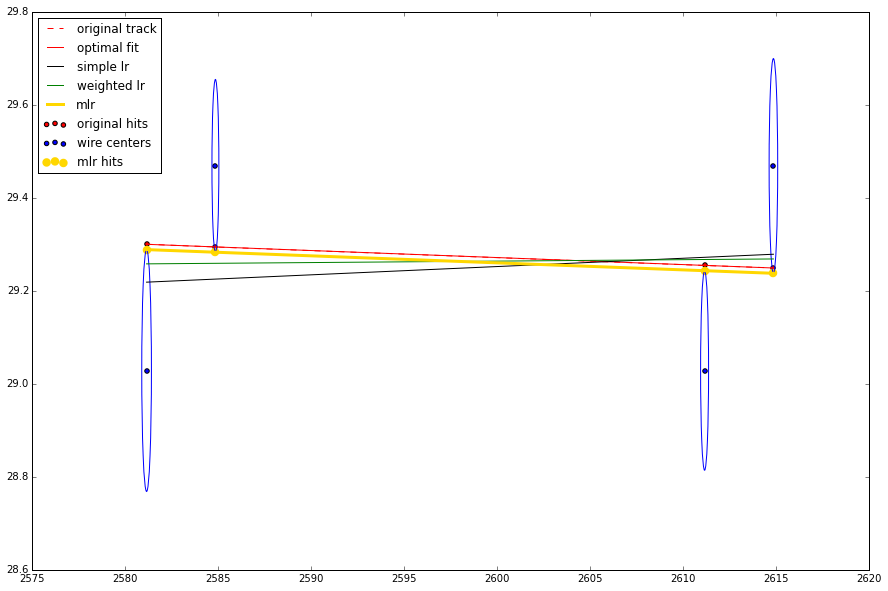

In [7]:
# event
event_id = 4 # 4.3
event = all_hits[all_hits['event'] == event_id]
event = modify_for_yz_analysis(event)

# track
track = event[event.TrackID == 3]

# plots
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = track.Wz.values.reshape(len(track), 1)
Wy = track.Wy.values.reshape(len(track), 1)
Z = track.Z.values.reshape(len(track), 1)
Y = track.Y.values.reshape(len(track), 1)
R = track.dist2Wire.values.reshape(len(track), 1)
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],1))

# originl track and hits
plt.plot(Z, Y, 'r--', label='original track')
plt.scatter(Z, Y, c='r', label='original hits')

# optimal fit
lr = LinearRegression()
lr.fit(Z, Y)
plt.plot(Z, lr.predict(Z), 'r', label='optimal fit')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)
    
# linear model fit
lr = LinearRegression()
lr.fit(Wz, Wy)
plt.plot(Wz, lr.predict(Wz), color='0', label='simple lr')

# weighted linear model fit
lr = LinearRegression()
w = (1./R).reshape(len(track), )
lr.fit(Wz, Wy, w)
plt.plot(Wz, lr.predict(Wz), color='g', label='weighted lr')

# margin linear regression
mlr = MarginLinearRegression(n_iter=2)
mlr.fit(Wz, Wy, R, R)
plt.plot(Wz, mlr.predict(Wz), color='gold', linewidth=3, label='mlr')
plt.scatter(mlr.hits_X, mlr.hits_Y, color='gold', linewidth=4, label='mlr hits')



plt.legend(loc='best')
plt.show()

#Bad track

In [8]:
from Y_views import *
event_id = 2
event = all_hits[all_hits['event'] == event_id]
event = modify_for_yz_analysis(event)
event

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k,Wy,Wz
79,79,73.361366,0.837755,2581.149902,2,383.880371,1,0,0,0,284,0.042245,2,38,0.8686,2581.15
41,41,64.405243,3.918991,2582.247559,3,383.923828,1,0,0,1,283,0.398998,2,0,3.5086,2582.25
42,42,64.391327,3.927866,2583.750244,3,383.967041,1,0,1,0,282,0.032134,2,1,3.9486,2583.75
80,80,73.391182,0.832995,2583.750732,2,383.973724,1,0,1,0,284,0.392995,2,39,0.4286,2583.75
48,48,64.137390,4.091341,2611.151855,3,384.884766,1,3,0,0,282,0.308665,2,7,4.3886,2611.15
85,85,73.705360,0.782221,2611.149902,2,384.881409,1,3,0,0,284,0.097779,2,44,0.8686,2611.15
49,49,64.113304,4.106993,2613.749023,3,384.968506,1,3,1,0,282,0.146996,2,8,3.9486,2613.75
86,86,73.735184,0.777356,2613.750732,2,384.972351,1,3,1,0,284,0.337356,2,45,0.4286,2613.75
87,87,75.654854,0.440022,2781.148926,2,390.561279,2,0,0,0,284,0.439979,2,46,0.8686,2781.15
50,50,62.551594,5.195495,2782.250488,3,390.588989,2,0,0,1,282,0.084507,2,9,5.2686,2782.25


In [9]:
track1 = event[(event.TrackID == 3) * (event.StatNb == 1)]
track2 = event[(event.TrackID == 2) * (event.StatNb == 2)]
track = pandas.concat([track1, track2], axis=0)
track

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k,Wy,Wz
41,41,64.405243,3.918991,2582.247559,3,383.923828,1,0,0,1,283,0.398998,2,0,3.5086,2582.25
42,42,64.391327,3.927866,2583.750244,3,383.967041,1,0,1,0,282,0.032134,2,1,3.9486,2583.75
48,48,64.137390,4.091341,2611.151855,3,384.884766,1,3,0,0,282,0.308665,2,7,4.3886,2611.15
49,49,64.113304,4.106993,2613.749023,3,384.968506,1,3,1,0,282,0.146996,2,8,3.9486,2613.75
87,87,75.654854,0.440022,2781.148926,2,390.561279,2,0,0,0,284,0.439979,2,46,0.8686,2781.15
88,88,75.667488,0.437574,2782.250977,2,390.597870,2,0,0,1,285,0.437575,2,47,-0.0114,2782.25
89,89,75.684669,0.434236,2783.750000,2,390.638794,2,0,1,0,284,0.005764,2,48,0.4286,2783.75
96,96,76.011482,0.369193,2812.250732,2,391.595184,2,3,0,1,285,0.369194,2,55,-0.0114,2812.25
97,97,76.028702,0.365713,2813.749756,2,391.639740,2,3,1,0,284,0.074288,2,56,0.4286,2813.75


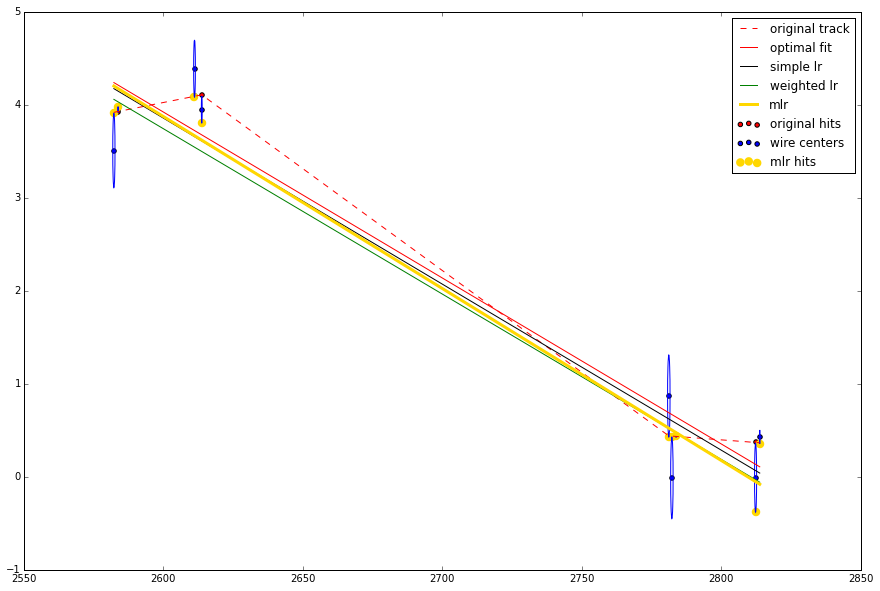

In [10]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = track.Wz.values.reshape(len(track), 1)
Wy = track.Wy.values.reshape(len(track), 1)
Z = track.Z.values.reshape(len(track), 1)
Y = track.Y.values.reshape(len(track), 1)
R = track.dist2Wire.values.reshape(len(track), 1)
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],1))

# originl track and hits
plt.plot(Z, Y, 'r--', label='original track')
plt.scatter(Z, Y, c='r', label='original hits')

# optimal fit
lr = LinearRegression()
lr.fit(Z, Y)
plt.plot(Z, lr.predict(Z), 'r', label='optimal fit')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)
    
# linear model fit
lr = LinearRegression()
lr.fit(Wz, Wy)
plt.plot(Wz, lr.predict(Wz), color='0', label='simple lr')

# weighted linear model fit
lr = LinearRegression()
w = (1./R).reshape(len(track), )
lr.fit(Wz, Wy, w)
plt.plot(Wz, lr.predict(Wz), color='g', label='weighted lr')

# margin linear regression
mlr = MarginLinearRegression(n_iter=1)
mlr.fit(Wz, Wy, R, R)
plt.plot(Wz, mlr.predict(Wz), color='gold', linewidth=3, label='mlr')
plt.scatter(mlr.hits_X, mlr.hits_Y, color='gold', linewidth=4, label='mlr hits')


plt.legend(loc='best')
plt.show()

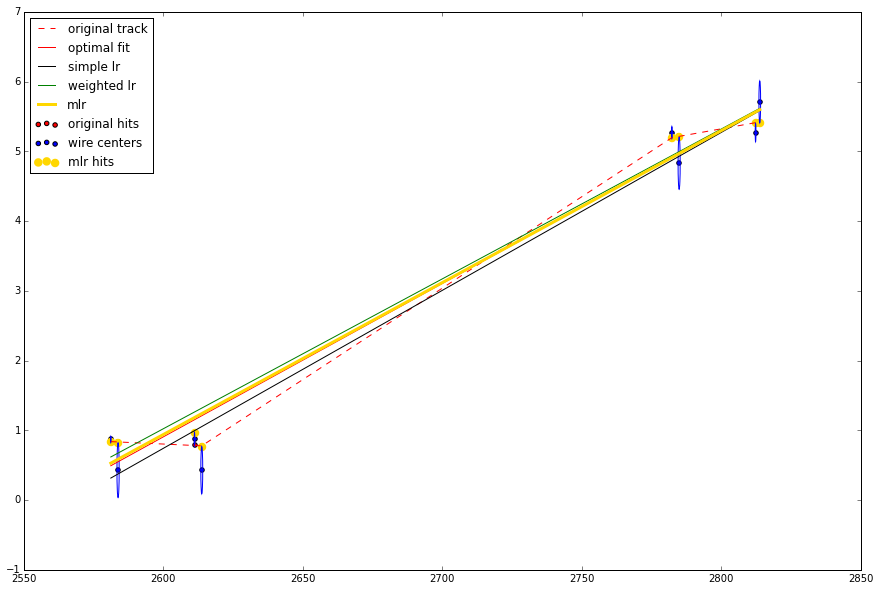

In [11]:
# event
event_id = 2
event = all_hits[all_hits['event'] == event_id]
event = modify_for_yz_analysis(event)

# track
track1 = event[(event.TrackID == 2) * (event.StatNb == 1)]
track2 = event[(event.TrackID == 3) * (event.StatNb == 2)]
track = pandas.concat([track1, track2], axis=0)

# plots
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = track.Wz.values.reshape(len(track), 1)
Wy = track.Wy.values.reshape(len(track), 1)
Z = track.Z.values.reshape(len(track), 1)
Y = track.Y.values.reshape(len(track), 1)
R = track.dist2Wire.values.reshape(len(track), 1)
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],1))

# originl track and hits
plt.plot(Z, Y, 'r--', label='original track')
plt.scatter(Z, Y, c='r', label='original hits')

# optimal fit
lr = LinearRegression()
lr.fit(Z, Y)
plt.plot(Z, lr.predict(Z), 'r', label='optimal fit')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)
    
# linear model fit
lr = LinearRegression()
lr.fit(Wz, Wy)
plt.plot(Wz, lr.predict(Wz), color='0', label='simple lr')

# weighted linear model fit
lr = LinearRegression()
w = (1./R).reshape(len(track), )
lr.fit(Wz, Wy, w)
plt.plot(Wz, lr.predict(Wz), color='g', label='weighted lr')

# margin linear regression
mlr = MarginLinearRegression(n_iter=1)
mlr.fit(Wz, Wy, R, R)
plt.plot(Wz, mlr.predict(Wz), color='gold', linewidth=3, label='mlr')
plt.scatter(mlr.hits_X, mlr.hits_Y, color='gold', linewidth=4, label='mlr hits')


plt.legend(loc='best')
plt.show()